<table>
<tr>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/NYC_Health.svg/1200px-NYC_Health.svg.png" alt="NYC Health Logo" width="300"/>
</td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Columbia_University_shield.svg/1200px-Columbia_University_shield.svg.png" alt="Columbia University Logo" width="300"/>
</td>
</tr>
</table>


# NYC COVID-19 Data Analysis

The COVID-19 pandemic has left a significant impact globally, with cities like New York being one of the hardest-hit regions. In this analysis, we'll be exploring various datasets related to COVID-19 trends and totals provided by the [NYC Health Department](https://github.com/nychealth/coronavirus-data).

---




The data sets are sourced from the NYC Health Department's GitHub repository, which publishes detailed COVID-19 statistics. The data sets cover:</br>

**Trends:** Daily, weekly, and monthly data reflecting the progression of the pandemic over time. </br></br>
**Totals**: Cumulative totals since the onset of the COVID-19 outbreak in NYC, starting from February 29, 2020. </br></br>
**By Group**: Counts and rates of cases, hospitalizations, and deaths stratified by several factors such as age, sex, borough, race/ethnicity, and neighborhood poverty.
</br></br>
Let's begin by importing the necessary libraries and datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_covid_byday = pd.read_csv("data/covid.csv", parse_dates=['date_of_interest'])
df_variant_data = pd.read_csv('data/covid/variant-classification.csv')
df_covid_variant = pd.read_csv('data/covid/variant-epi-data.csv', parse_dates=['Sequence week'])
df_covid_bygroup = pd.read_csv('data/covid/by-group.csv')
df_test = pd.read_csv('data/covid/tests.csv', parse_dates=['DATE'])

## 1# Analyzing covid trends over time for every borough.

In [3]:
df_covid_byday.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_covid_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_of_interest                 1158 non-null   datetime64[ns]
 1   CASE_COUNT                       1158 non-null   int64         
 2   PROBABLE_CASE_COUNT              1158 non-null   int64         
 3   HOSPITALIZED_COUNT               1158 non-null   int64         
 4   DEATH_COUNT                      1158 non-null   int64         
 5   PROBABLE_DEATH_COUNT             1158 non-null   int64         
 6   CASE_COUNT_7DAY_AVG              1158 non-null   int64         
 7   ALL_CASE_COUNT_7DAY_AVG          1158 non-null   int64         
 8   HOSP_COUNT_7DAY_AVG              1158 non-null   int64         
 9   DEATH_COUNT_7DAY_AVG             1158 non-null   int64         
 10  ALL_DEATH_COUNT_7DAY_AVG         1158 non-null   int64      

To make the analysis easier, we want to set the index as date.

In [5]:
df_covid_byday = df_covid_byday.set_index('date_of_interest')

In [6]:
df_covid_byday.head()

,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
date_of_interest,,,,,,,,,,,,,,,,,,,,,
2020-02-29,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-02,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,1,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-04,5,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's see the case, hospitalized, and death for every borough (total).

<Axes: xlabel='date_of_interest'>

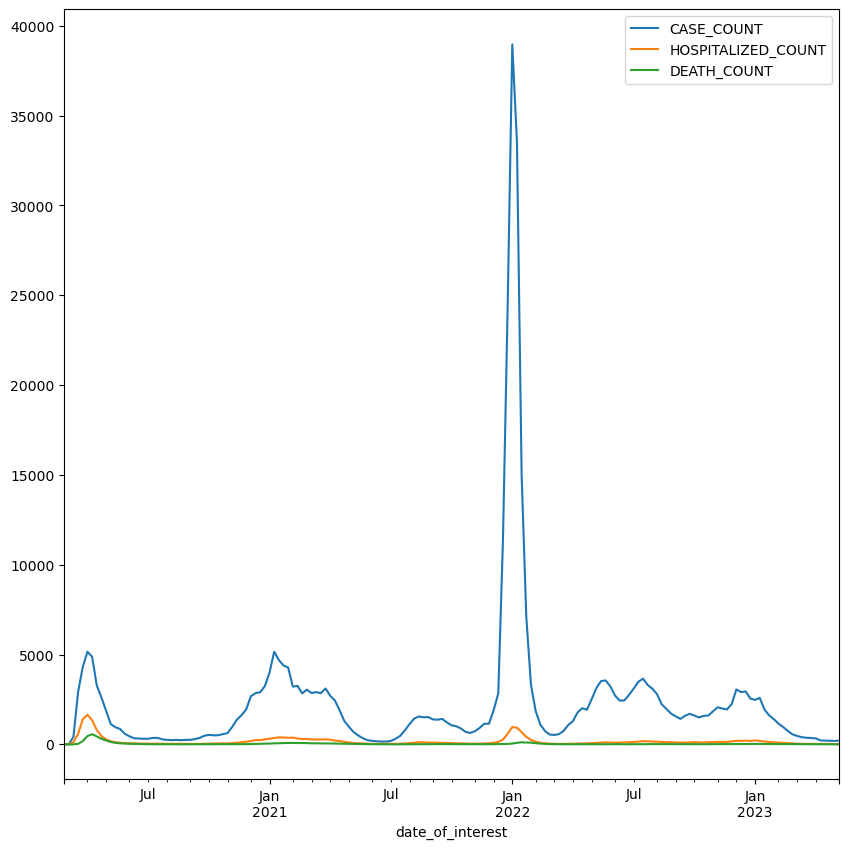

In [7]:
df_covid_byday.resample('W')[['CASE_COUNT', 
                              'HOSPITALIZED_COUNT', 
                              'DEATH_COUNT']].mean().plot(kind='line', figsize=(10,10))

**Analysis** : Based on the graph above, the highest peak of cases happened in January 2022. In the first hill before July, the case reached 5,000 cases per day, and the death was the highest at that time. Unlike January 2022's peak, even though the cases were the highest, the number of deaths and hospitalizations was not increasing. It's probably the effect of mass vaccinations and immunity development after previous exposure to Covid.

Let's now take a look at data for cases, hospitalized, and deaths for different boroughs.

<Axes: xlabel='date_of_interest'>

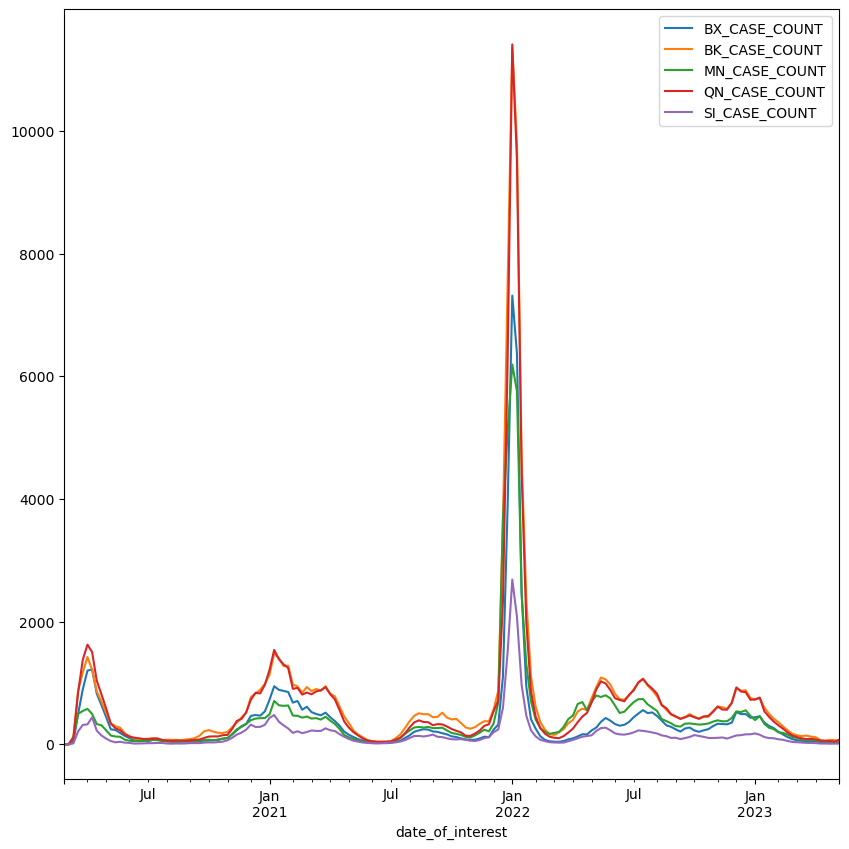

In [8]:
df_covid_byday.resample('W')[['BX_CASE_COUNT', 
                              'BK_CASE_COUNT', 
                              'MN_CASE_COUNT', 
                              'QN_CASE_COUNT', 
                              'SI_CASE_COUNT']].mean().plot(kind='line', figsize=(10,10))

<Axes: xlabel='date_of_interest'>

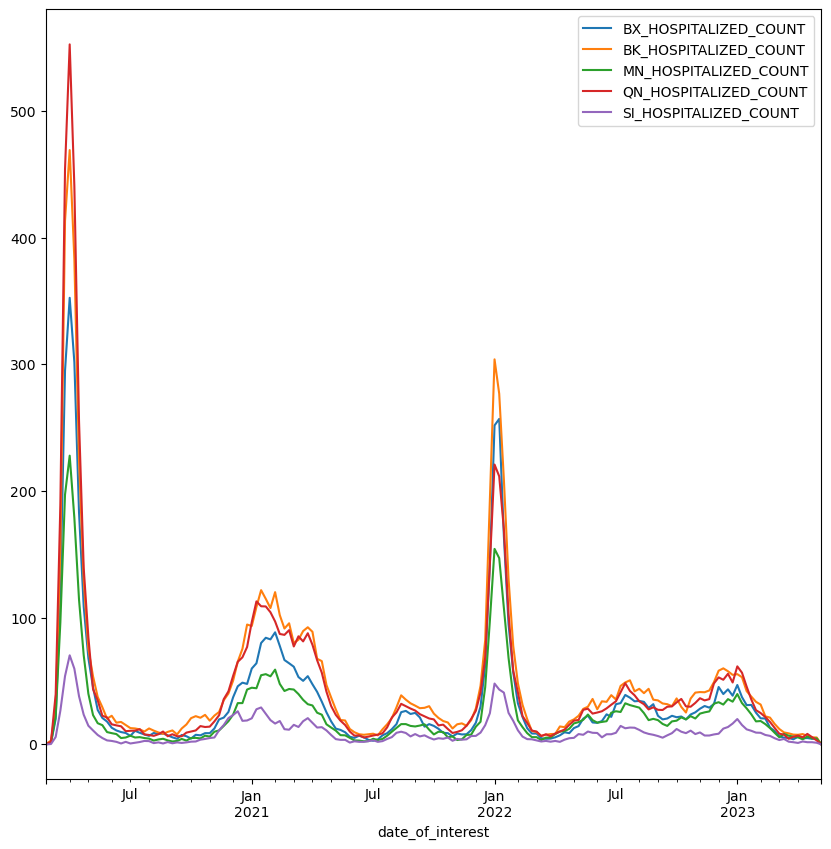

In [9]:
df_covid_byday.resample('W')[['BX_HOSPITALIZED_COUNT', 
                               'BK_HOSPITALIZED_COUNT', 
                               'MN_HOSPITALIZED_COUNT', 
                               'QN_HOSPITALIZED_COUNT', 
                               'SI_HOSPITALIZED_COUNT']].mean().plot(kind='line', figsize=(10,10))

<Axes: xlabel='date_of_interest'>

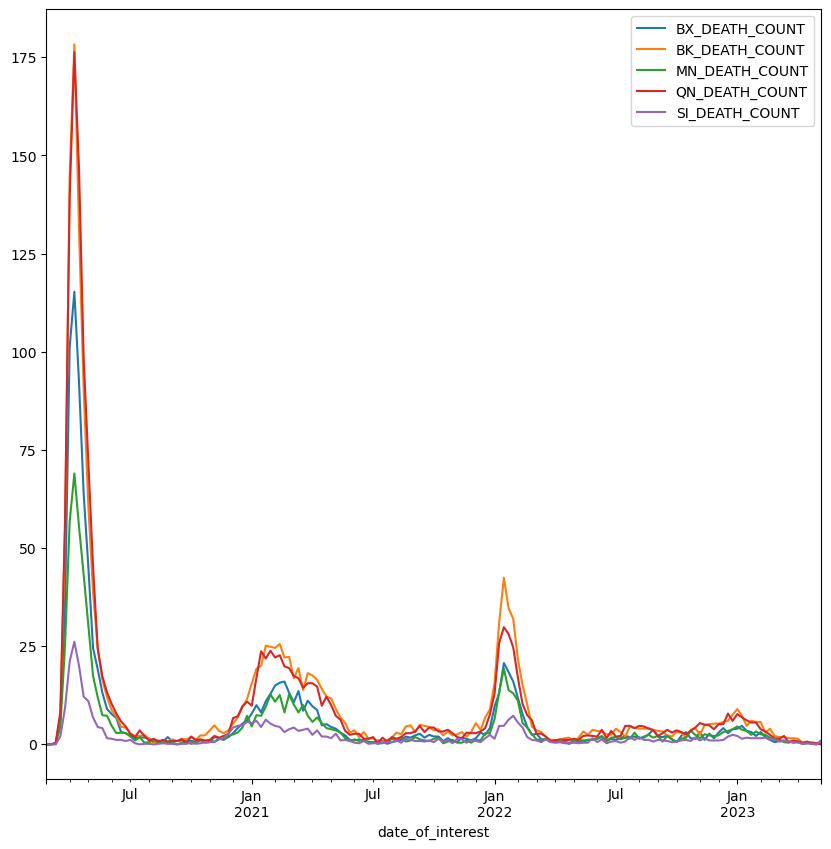

In [10]:
df_covid_byday.resample('W')[['BX_DEATH_COUNT', 
                               'BK_DEATH_COUNT', 
                               'MN_DEATH_COUNT', 
                               'QN_DEATH_COUNT', 
                               'SI_DEATH_COUNT']].mean().plot(kind='line', figsize=(10,10))

**Analysis** : Based on the three different graphs above, we could see that Queens was the most impacted by Covid according to the number of cases that happened there at every peak. However, the number of people hospitalized in Queens was not always aligned with the number of cases. Brooklyn accepted more patients on the second peak based on a comparison with Queen's ability to hospitalize the patients. But after, if Brooklyn could serve them, the number of deaths in Brooklyn was also higher than in Queens.

Even though the number of cases was the highest in Jan 2022, the hospitalization count was the highest at the beginning of the pandemic. It seems because of vaccinations, most people were not going to the hospital. 

After looking at the trends, we want to see which variants hit NYC the most?

## 2# Analyzing covid-19 variant.

In [11]:
df_variant_data

,variant,name,count,total,percent_in_NYC
0,B.1.1.529,Omicron,1765,1768,100
1,B.1.1.7,Alpha,0,1768,0
2,B.1.351,Beta,0,1768,0
3,B.1.427,Epsilon,0,1768,0
4,B.1.429,Epsilon,0,1768,0
5,B.1.525,Eta,0,1768,0
6,B.1.526,Iota,0,1768,0
7,B.1.617.2,Delta,0,1768,0
8,B.1.621,NaN,0,1768,0
9,P.1,Gamma,0,1768,0


In [12]:
df_covid_variant.head()

,Sequence week,B.1.526 +E484K count,B.1.526 +E484K percent,B.1.526 no E484K count,B.1.526 no E484K percent,B.1.1.7 count,B.1.1.7 percent,P.1 count,P.1 percent,B.1.427 count,...,EG.5 percent,FL.1 count,FL.1 percent,XBB.1.16 count,XBB.1.16 percent,Omicron other count,Omicron other percent,Other count,Other percent,incomplete
0,2021-01-02,3,0,33,5,4,1,0,0,1,...,0,0,0,0,0,0,0,571,92,NaN
1,2021-01-09,8,1,50,6,9,1,0,0,5,...,0,0,0,0,0,0,0,796,90,NaN
2,2021-01-16,3,1,50,12,14,3,0,0,5,...,0,0,0,0,0,0,0,337,80,NaN
3,2021-01-23,12,2,56,12,8,2,0,0,1,...,0,0,0,0,0,0,0,399,83,NaN
4,2021-01-30,50,6,133,17,24,3,0,0,11,...,0,0,0,0,0,0,0,550,70,NaN


Because it's hard to understand the data if the variants are presented in their code, let's change the name of the columns based on the previous `df_varian_data`.

In [13]:
name_mapping = {
    "B.1.1.529": "Omicron",
    "B.1.1.7": "Alpha",
    "B.1.351": "Beta",
    "B.1.427": "Epsilon",
    "B.1.429": "Epsilon",
    "B.1.525": "Eta",
    "B.1.526": "Iota",
    "B.1.617.2": "Delta",
    "P.1": "Gamma",
    "P.2": "Zeta"
}

new_columns = {}
for column in df_covid_variant.columns:
    for variant, name in name_mapping.items():
        if column.startswith(variant):
            new_columns[column] = column.replace(variant, name)
            break

df_covid_variant.rename(columns=new_columns, inplace=True)

In [14]:
df_covid_variant.columns

Index(['Sequence week', 'Iota +E484K count', 'Iota +E484K  percent',
       'Iota no E484K count', 'Iota no E484K percent', 'Alpha count',
       'Alpha percent', 'Gamma count', 'Gamma percent', 'Epsilon count',
       'Epsilon percent', 'Epsilon count', 'Epsilon percent', 'Beta count',
       'Beta percent', 'Delta count', 'Delta percent', 'B.1.621 count',
       'B.1.621 percent', 'BA.1 count', 'BA.1 percent', 'BA.2 count',
       'BA.2 percent', 'BA.2.12.1 count', 'BA.2.12.1 percent', 'BA.2.75 count',
       'BA.2.75 percent', 'BA.4 count', 'BA.4 percent', 'BA.4.6 count',
       'BA.4.6 percent', 'BA.5 count', 'BA.5 percent', 'BF.7 count',
       'BF.7 percent', 'BQ.1 count', 'BQ.1 percent', 'BQ.1.1 count',
       'BQ.1.1 percent', 'XBB count', 'XBB percent', 'XBB.1.5 count',
       'XBB.1.5 percent', 'XBB.1.9 count', 'XBB.1.9 percent', 'EG.5 count',
       'EG.5 percent', 'FL.1 count', 'FL.1 percent', 'XBB.1.16 count',
       'XBB.1.16 percent', 'Omicron other count', 'Omicron othe

We also want to delete unnecesary data that located in `incomplete` column.

In [15]:
df_covid_variant = df_covid_variant.drop(columns='incomplete')

In [16]:
df_covid_variant = df_covid_variant.set_index("Sequence week")

In [17]:
df_covid_variant

,Iota +E484K count,Iota +E484K percent,Iota no E484K count,Iota no E484K percent,Alpha count,Alpha percent,Gamma count,Gamma percent,Epsilon count,Epsilon percent,...,EG.5 count,EG.5 percent,FL.1 count,FL.1 percent,XBB.1.16 count,XBB.1.16 percent,Omicron other count,Omicron other percent,Other count,Other percent
Sequence week,,,,,,,,,,,,,,,,,,,,,
2021-01-02,3,0,33,5,4,1,0,0,1,0,...,0,0,0,0,0,0,0,0,571,92
2021-01-09,8,1,50,6,9,1,0,0,5,1,...,0,0,0,0,0,0,0,0,796,90
2021-01-16,3,1,50,12,14,3,0,0,5,1,...,0,0,0,0,0,0,0,0,337,80
2021-01-23,12,2,56,12,8,2,0,0,1,0,...,0,0,0,0,0,0,0,0,399,83
2021-01-30,50,6,133,17,24,3,0,0,11,1,...,0,0,0,0,0,0,0,0,550,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-12,0,0,0,0,0,0,0,0,0,0,...,107,22,140,28,77,16,1,0,3,1
2023-08-19,0,0,0,0,0,0,0,0,0,0,...,120,22,138,25,114,21,0,0,2,0
2023-08-26,0,0,0,0,0,0,0,0,0,0,...,125,26,117,25,91,19,0,0,1,0


Let's analyze the data by looking at the total number of cases for every variant.

<Axes: >

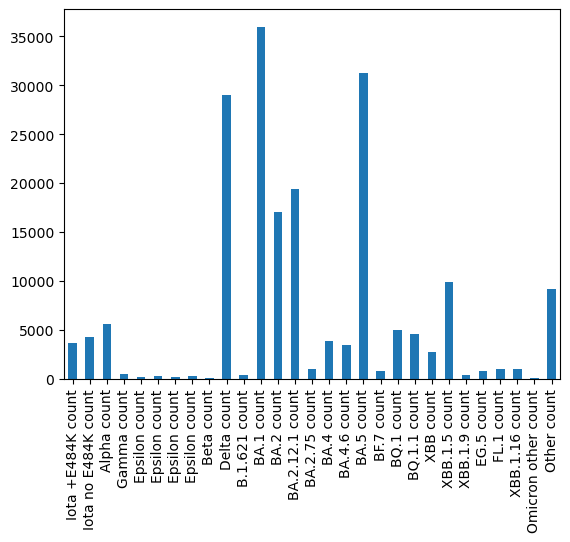

In [18]:
count_columns = [col for col in df_covid_variant.columns if "count" in col]
df_filtered = df_covid_variant[count_columns]
df_filtered.sum().plot(kind='bar')

**Analysis**: We could see that BA.1 was the most devastating covid variant to NYC. 
*Additional Information* : Based on an internet search, BA.1 is actually the Omicron variant that the previous dataset didn't include.

Another analysis we could do with this data is to look at the time data to see how every variant mutates to another in different time windows. 

Text(0.5, 1.0, 'Significant Covid Variance')

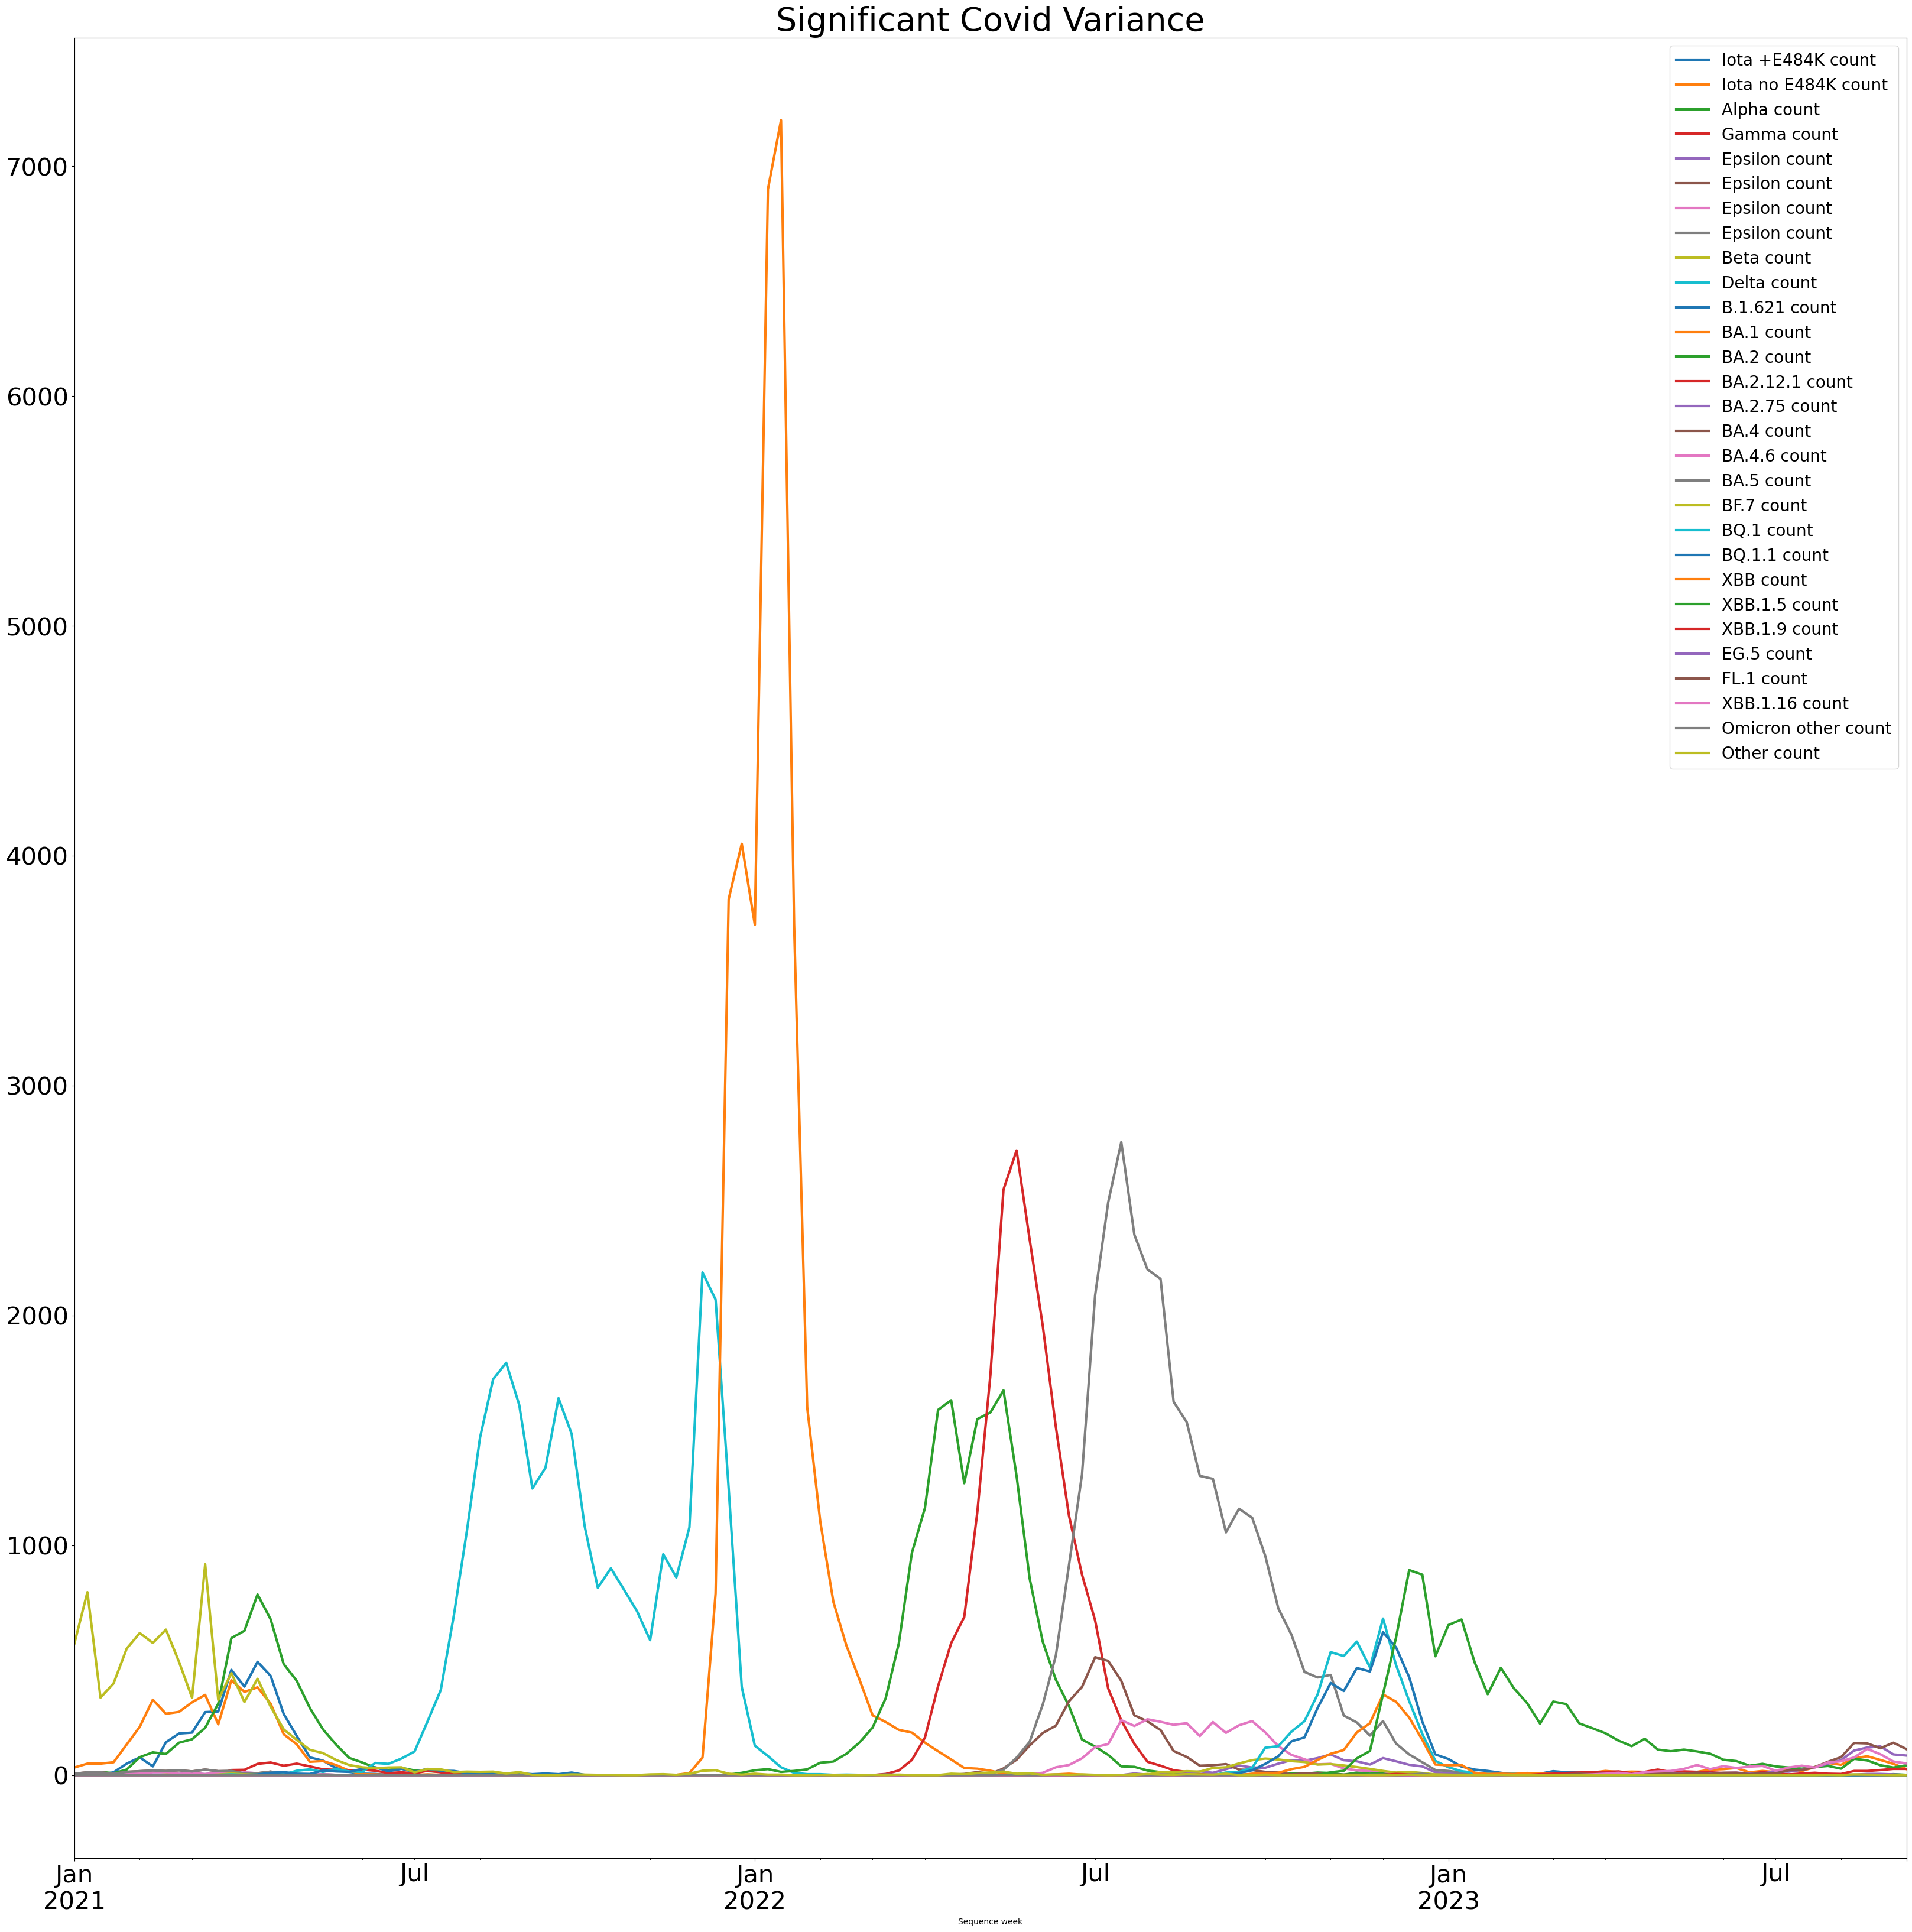

In [19]:
ax = df_filtered.plot(kind='line', figsize=(40,40), fontsize=30.0, linewidth=3.0)
ax.legend(fontsize=20, title_fontsize='50')
ax.set_title('Significant Covid Variance', fontsize=40)

As it's really hard to understand the data with many covid variants, let's filter data only to columns with significant values (above the mean).

let's create a new variable named `mean_sum` that will serve as our filter.

In [20]:
mean_sum = df_filtered.sum().mean()

In [21]:
significant_columns = df_filtered.columns[df_filtered.sum() > mean_sum]
df_significant = df_filtered[significant_columns]

Text(0.5, 1.0, 'Significant Covid Variance')

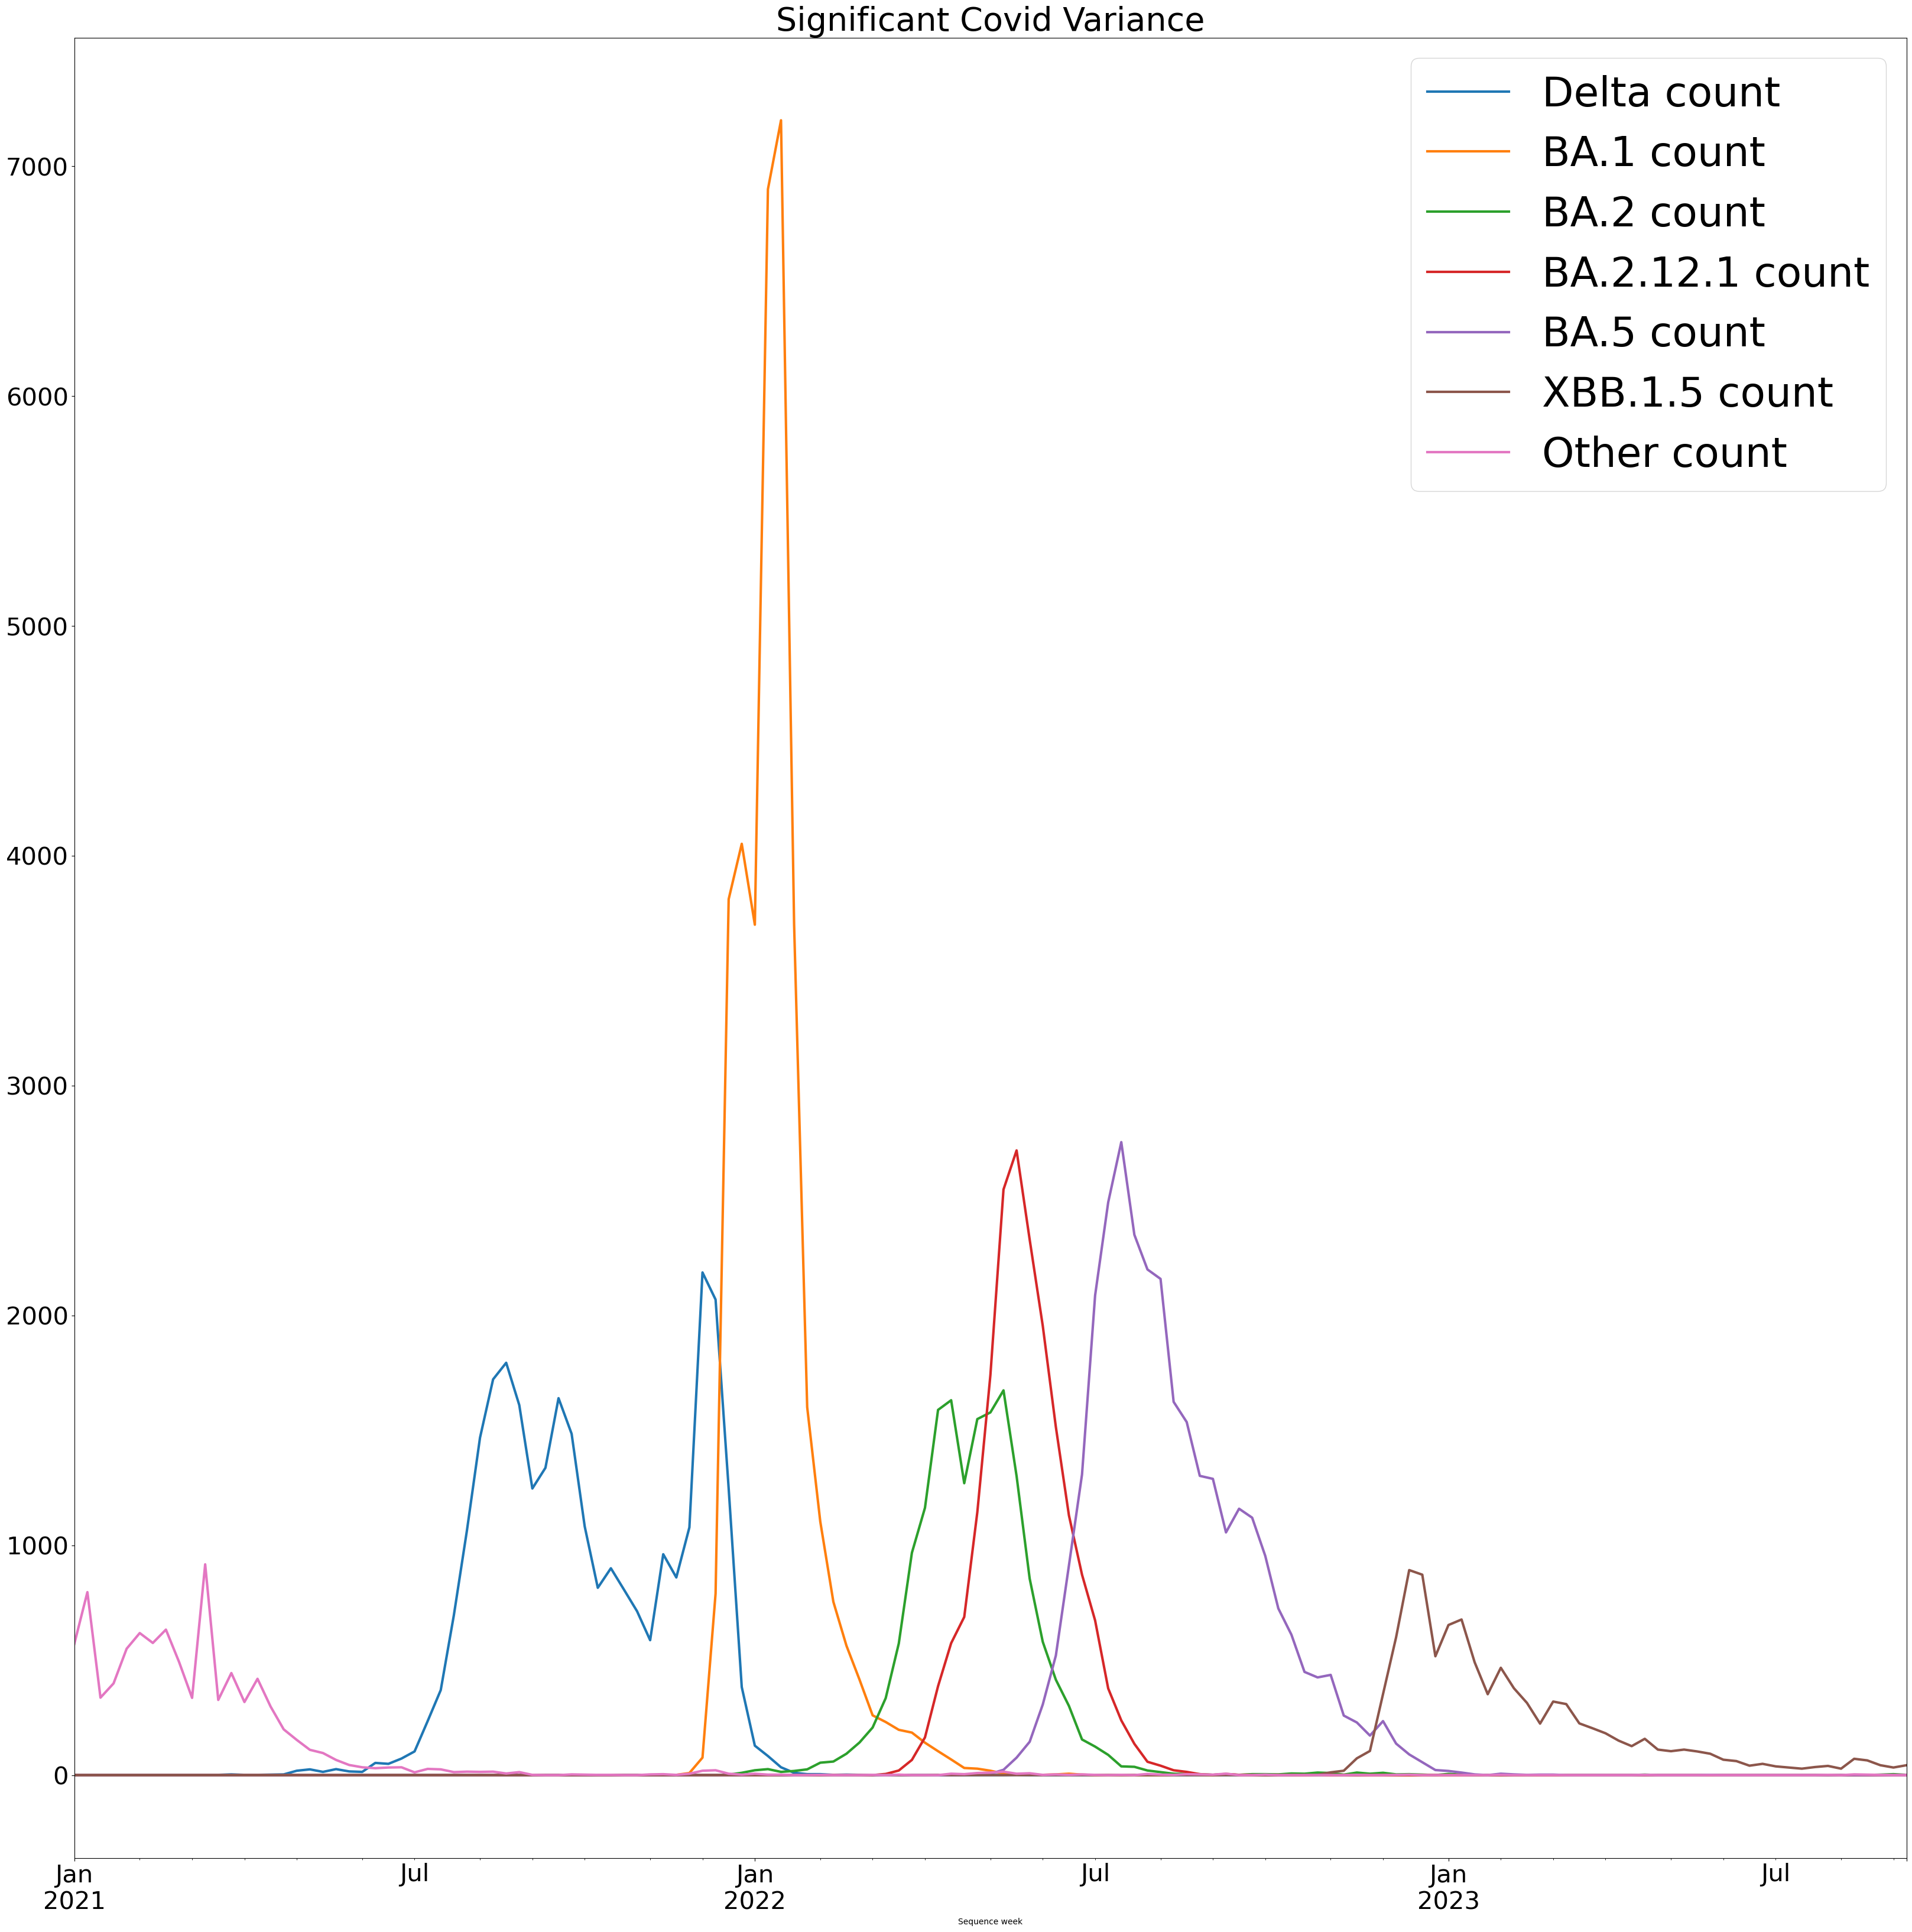

In [22]:
ax = df_significant.plot(kind='line', figsize=(40,40), fontsize=30.0, linewidth=3.0)
ax.legend(fontsize=50, title_fontsize='50')
ax.set_title('Significant Covid Variance', fontsize=40)

As both data has `datetime` format, we can merge both data together for further analysis.</br></br>
But the problem is that the first dataset is daily, while the second dataset is in weekly.</br></br>
So, we need to create a new dataset from the first dataset that changes the format to weekly.

We also want to drop many columns from `df_covid_byday`, to get only for the big picture, not every borough.

In [23]:
df_covid_byweek = df_covid_byday[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].resample('W-SAT').sum()

I used `('W-SAT')` instead of `('W')` to make the data start at the same day with the second dataframe, which is Saturday.

In [24]:
df_covid_byweek.head()

,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
date_of_interest,,,
2020-02-29,1,1,0
2020-03-07,24,42,0
2020-03-14,1918,624,3
2020-03-21,18929,3512,154
2020-03-28,29164,9071,1025


Now, we can merge both dataset with `inner` join.</br>

The reason I chose `inner` join is because the starting date from `df_covid_byweek` and `df_significant` is different.</br>

But first, let's `reset_index` for both dataset.

In [25]:
df_significant = df_significant.reset_index()
df_covid_byweek = df_covid_byweek.reset_index()

In [26]:
df_merged = pd.merge(df_covid_byweek, df_significant, 
         left_on='date_of_interest', 
         right_on='Sequence week',
         how='inner')

In [27]:
df_merged.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,Sequence week,Delta count,BA.1 count,BA.2 count,BA.2.12.1 count,BA.5 count,XBB.1.5 count,Other count
0,2021-01-02,27404,2127,309,2021-01-02,0,0,0,0,0,0,571
1,2021-01-09,36364,2469,405,2021-01-09,0,0,0,0,0,0,796
2,2021-01-16,33133,2704,442,2021-01-16,0,0,0,0,0,0,337
3,2021-01-23,30734,2690,504,2021-01-23,0,0,0,0,0,0,399
4,2021-01-30,29956,2580,552,2021-01-30,0,0,0,0,0,0,550


In [28]:
df_merged = df_merged.drop(columns='Sequence week')

In [29]:
df_merged = df_merged.set_index('date_of_interest')

<Axes: xlabel='date_of_interest'>

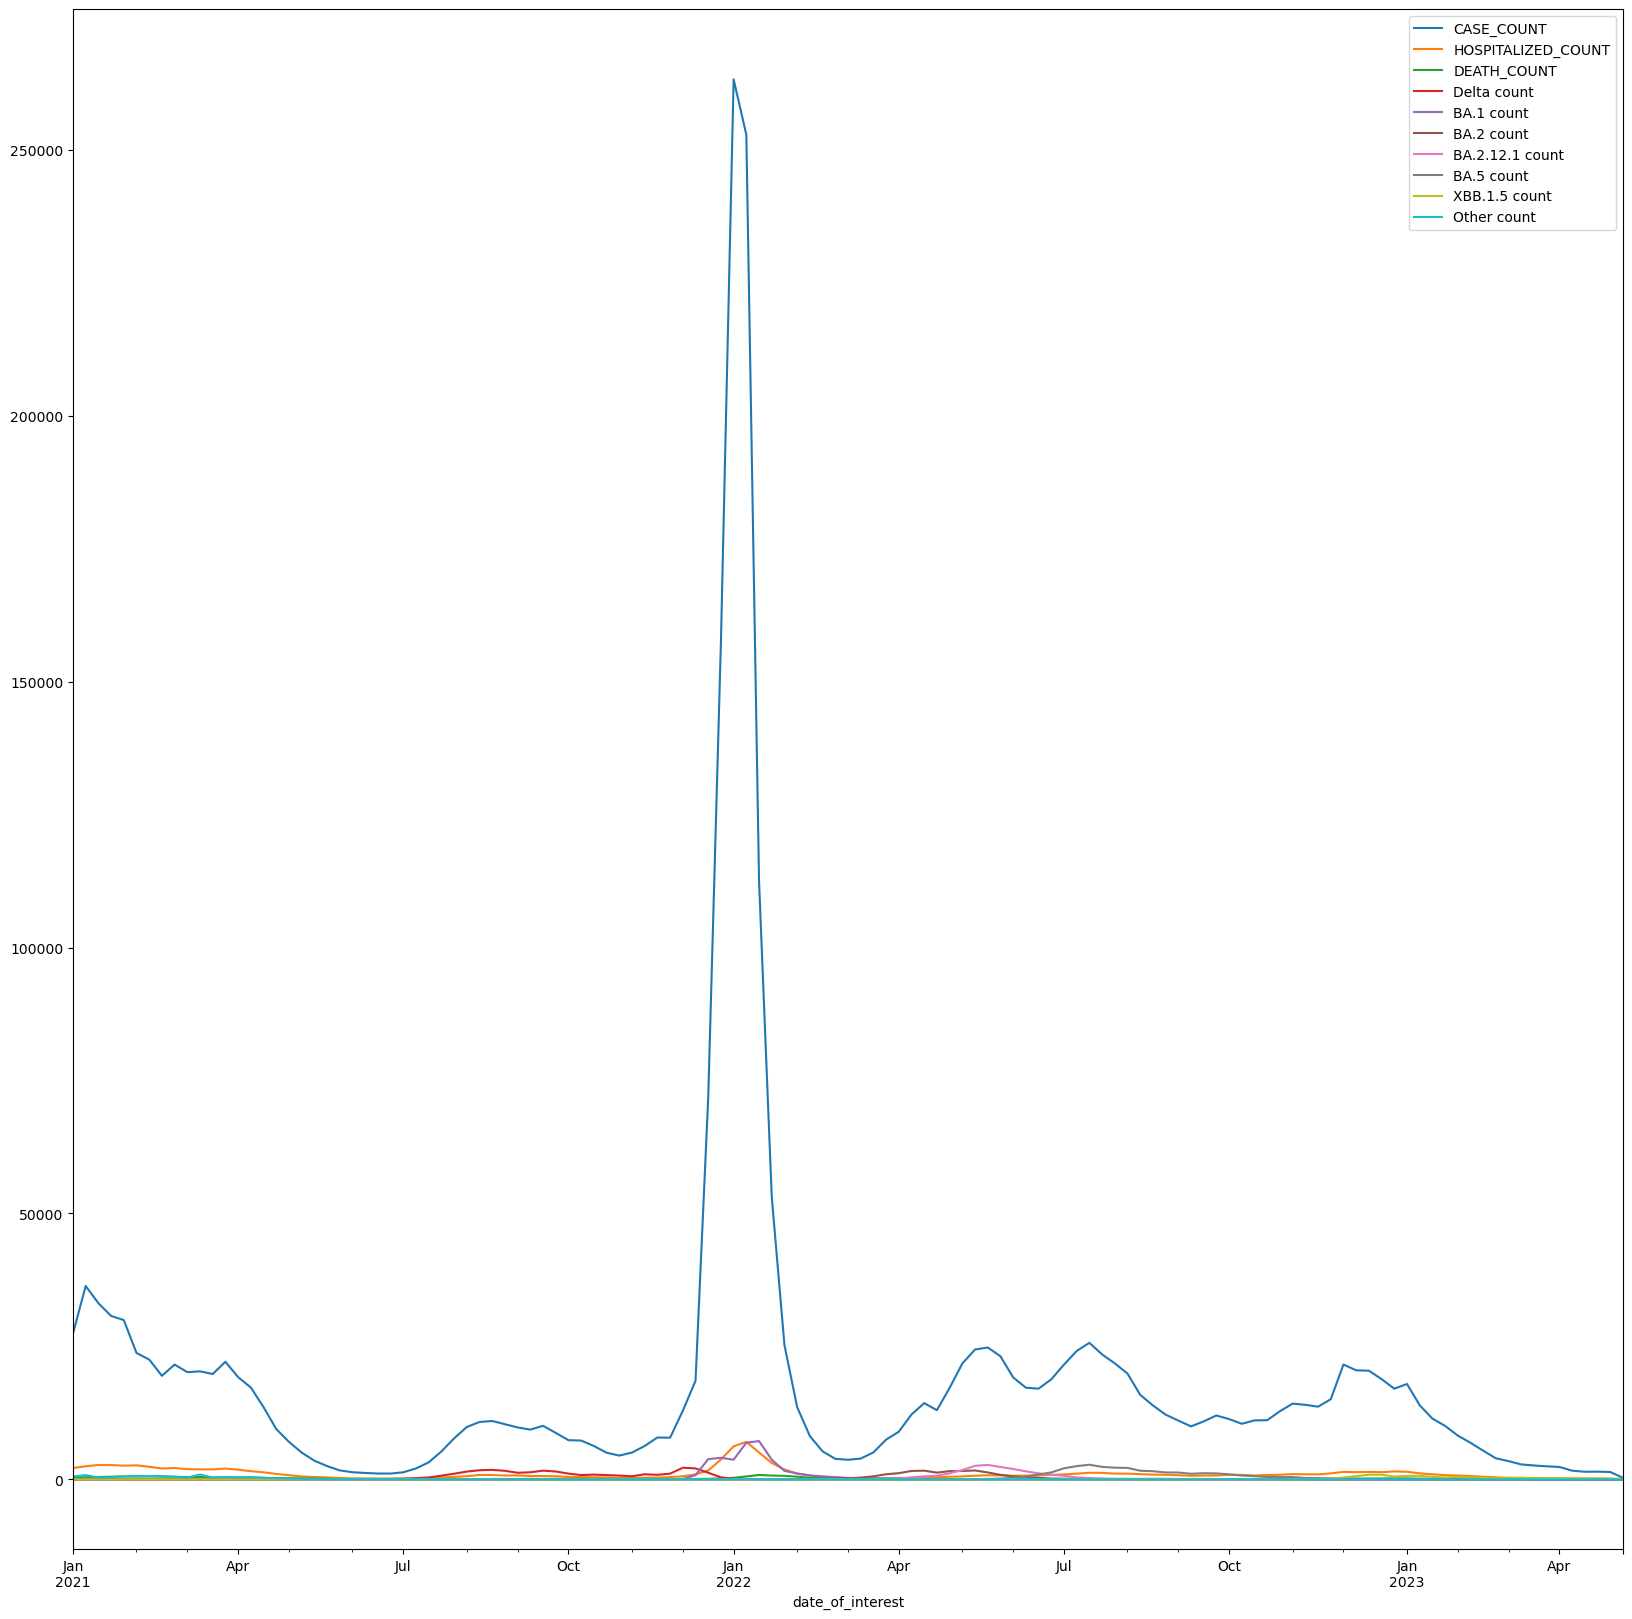

In [30]:
(df_merged.plot(kind='line', figsize=(20,20)))

**Analysis** : Based on the graph above, most of the Covid cases were unrecognized. The highest data from `BA.1 count` or Omicron was far lower than the `CASE_COUNT`.

Now the data is successfully merged. Let's do further analysis

## 3# Analyzing the Number of Tests.

In [31]:
df_test.head()

,DATE,TOTAL_TESTS,POSITIVE_TESTS,PERCENT_POSITIVE,TOTAL_TESTS_7DAYS_AVG,POSITIVE_TESTS_7DAYS_AVG,PERCENT_POSITIVE_7DAYS_AVG,TOTAL_ANTIGEN_TESTS,TOTAL_ANTIGEN_TESTS_7DAYS_AVG,INCOMPLETE
0,2020-03-03,15,1,0.0667,0,0,0.0,0,0,0
1,2020-03-04,40,5,0.1250,0,0,0.0,0,0,0
2,2020-03-05,66,4,0.0606,0,0,0.0,0,0,0
3,2020-03-06,89,8,0.0899,0,0,0.0,0,0,0
4,2020-03-07,77,8,0.1039,0,0,0.0,1,0,0


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DATE                           1176 non-null   datetime64[ns]
 1   TOTAL_TESTS                    1176 non-null   int64         
 2   POSITIVE_TESTS                 1176 non-null   int64         
 3   PERCENT_POSITIVE               1176 non-null   float64       
 4   TOTAL_TESTS_7DAYS_AVG          1176 non-null   int64         
 5   POSITIVE_TESTS_7DAYS_AVG       1176 non-null   int64         
 6   PERCENT_POSITIVE_7DAYS_AVG     1176 non-null   float64       
 7   TOTAL_ANTIGEN_TESTS            1176 non-null   int64         
 8   TOTAL_ANTIGEN_TESTS_7DAYS_AVG  1176 non-null   int64         
 9   INCOMPLETE                     1176 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 92.0 KB


In [33]:
df_test = df_test.drop(columns='INCOMPLETE')

In [34]:
df_test = df_test.set_index('DATE')

<Axes: xlabel='DATE'>

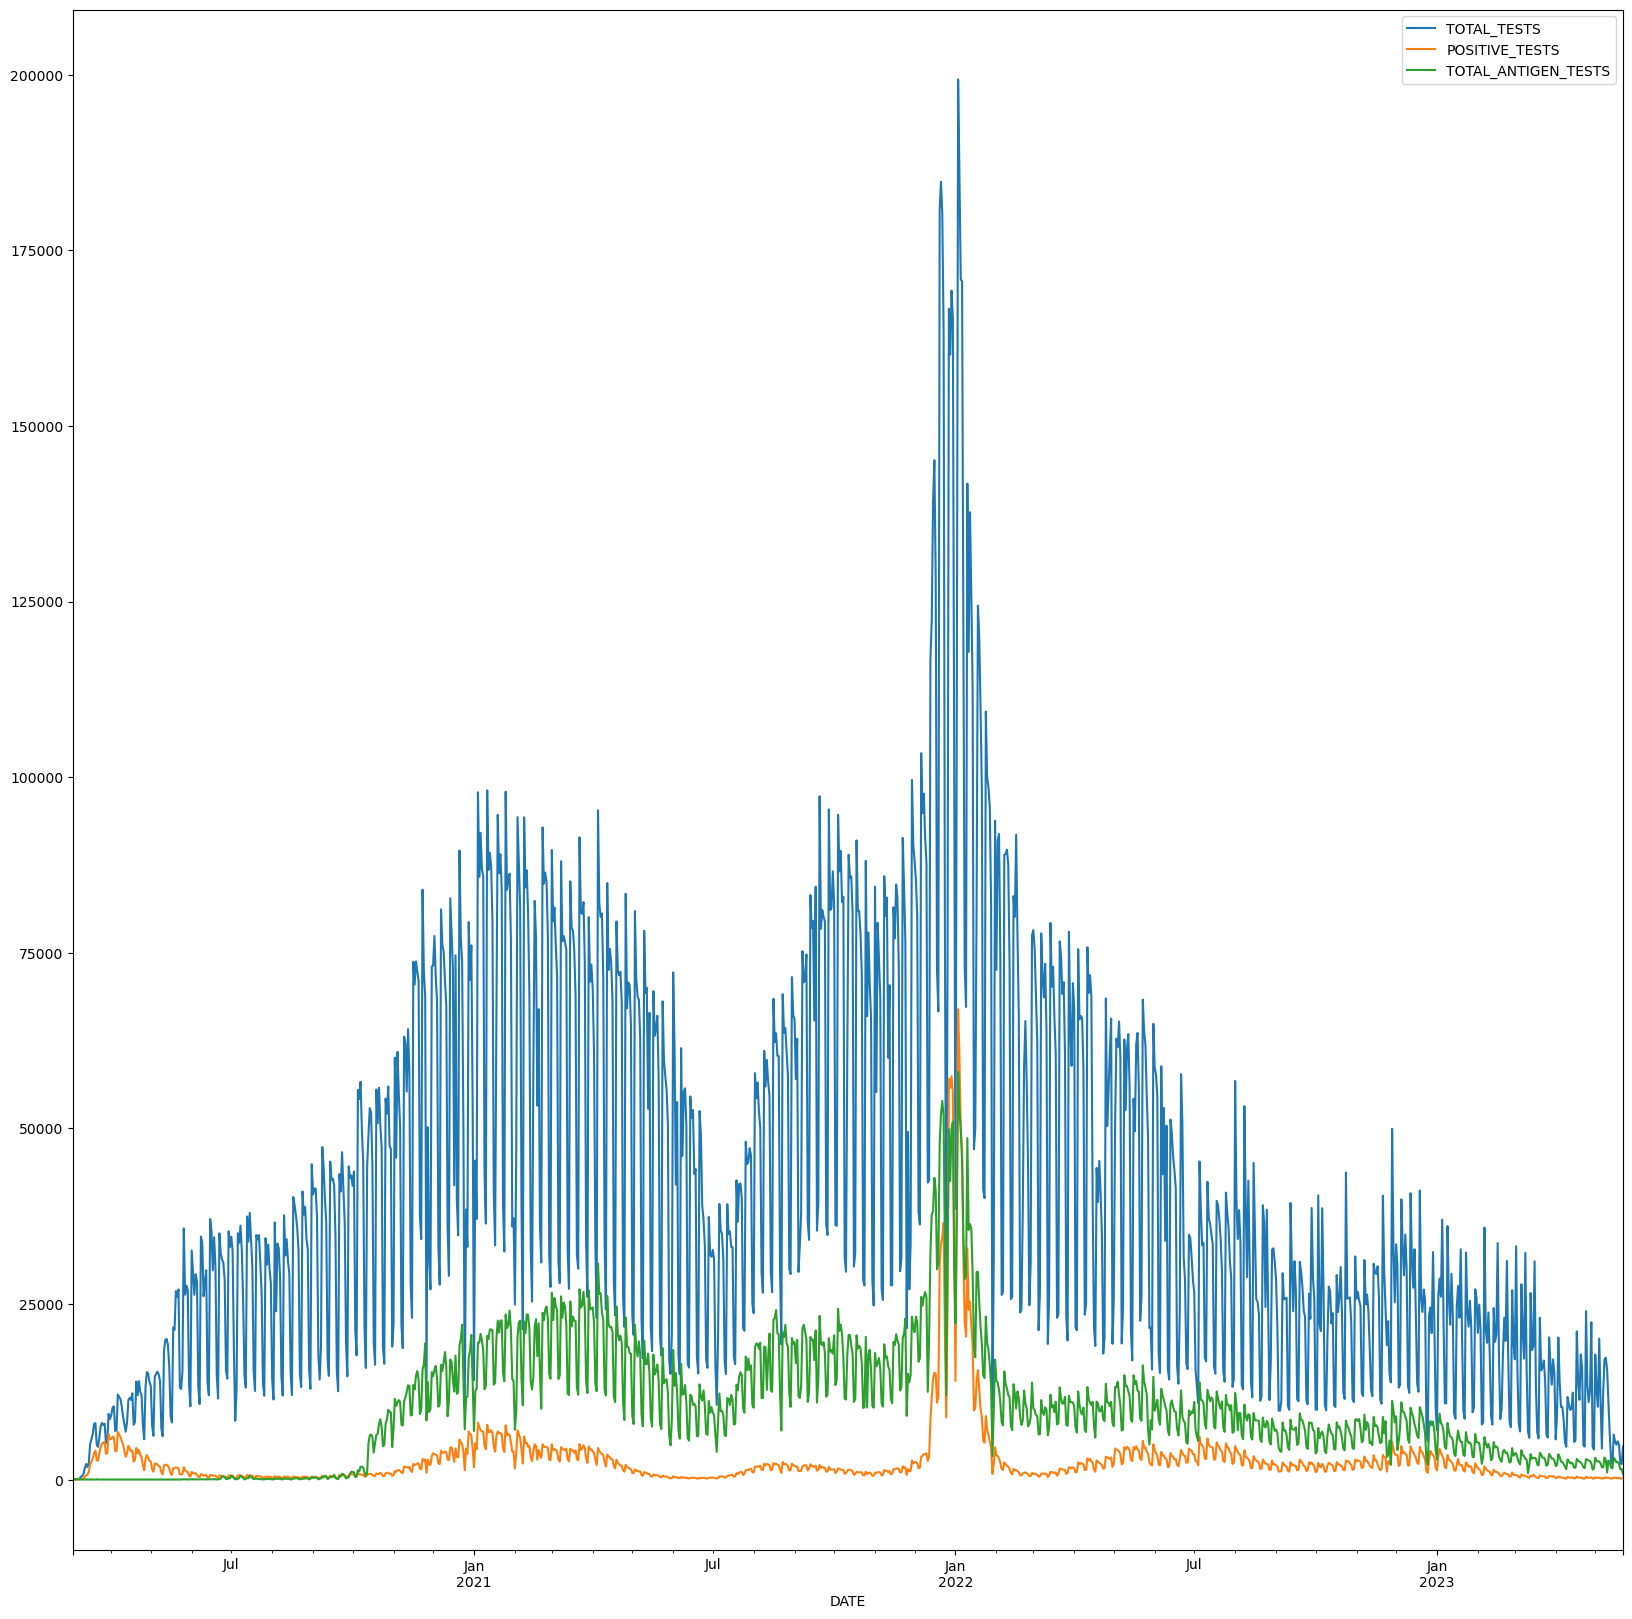

In [35]:
df_test[['TOTAL_TESTS', 'POSITIVE_TESTS', 'TOTAL_ANTIGEN_TESTS']].plot(kind='line', figsize=(20,20))

As it is hard to understand the data based on daily, let's see the 7-day average/weekly version of the data.

<Axes: xlabel='DATE'>

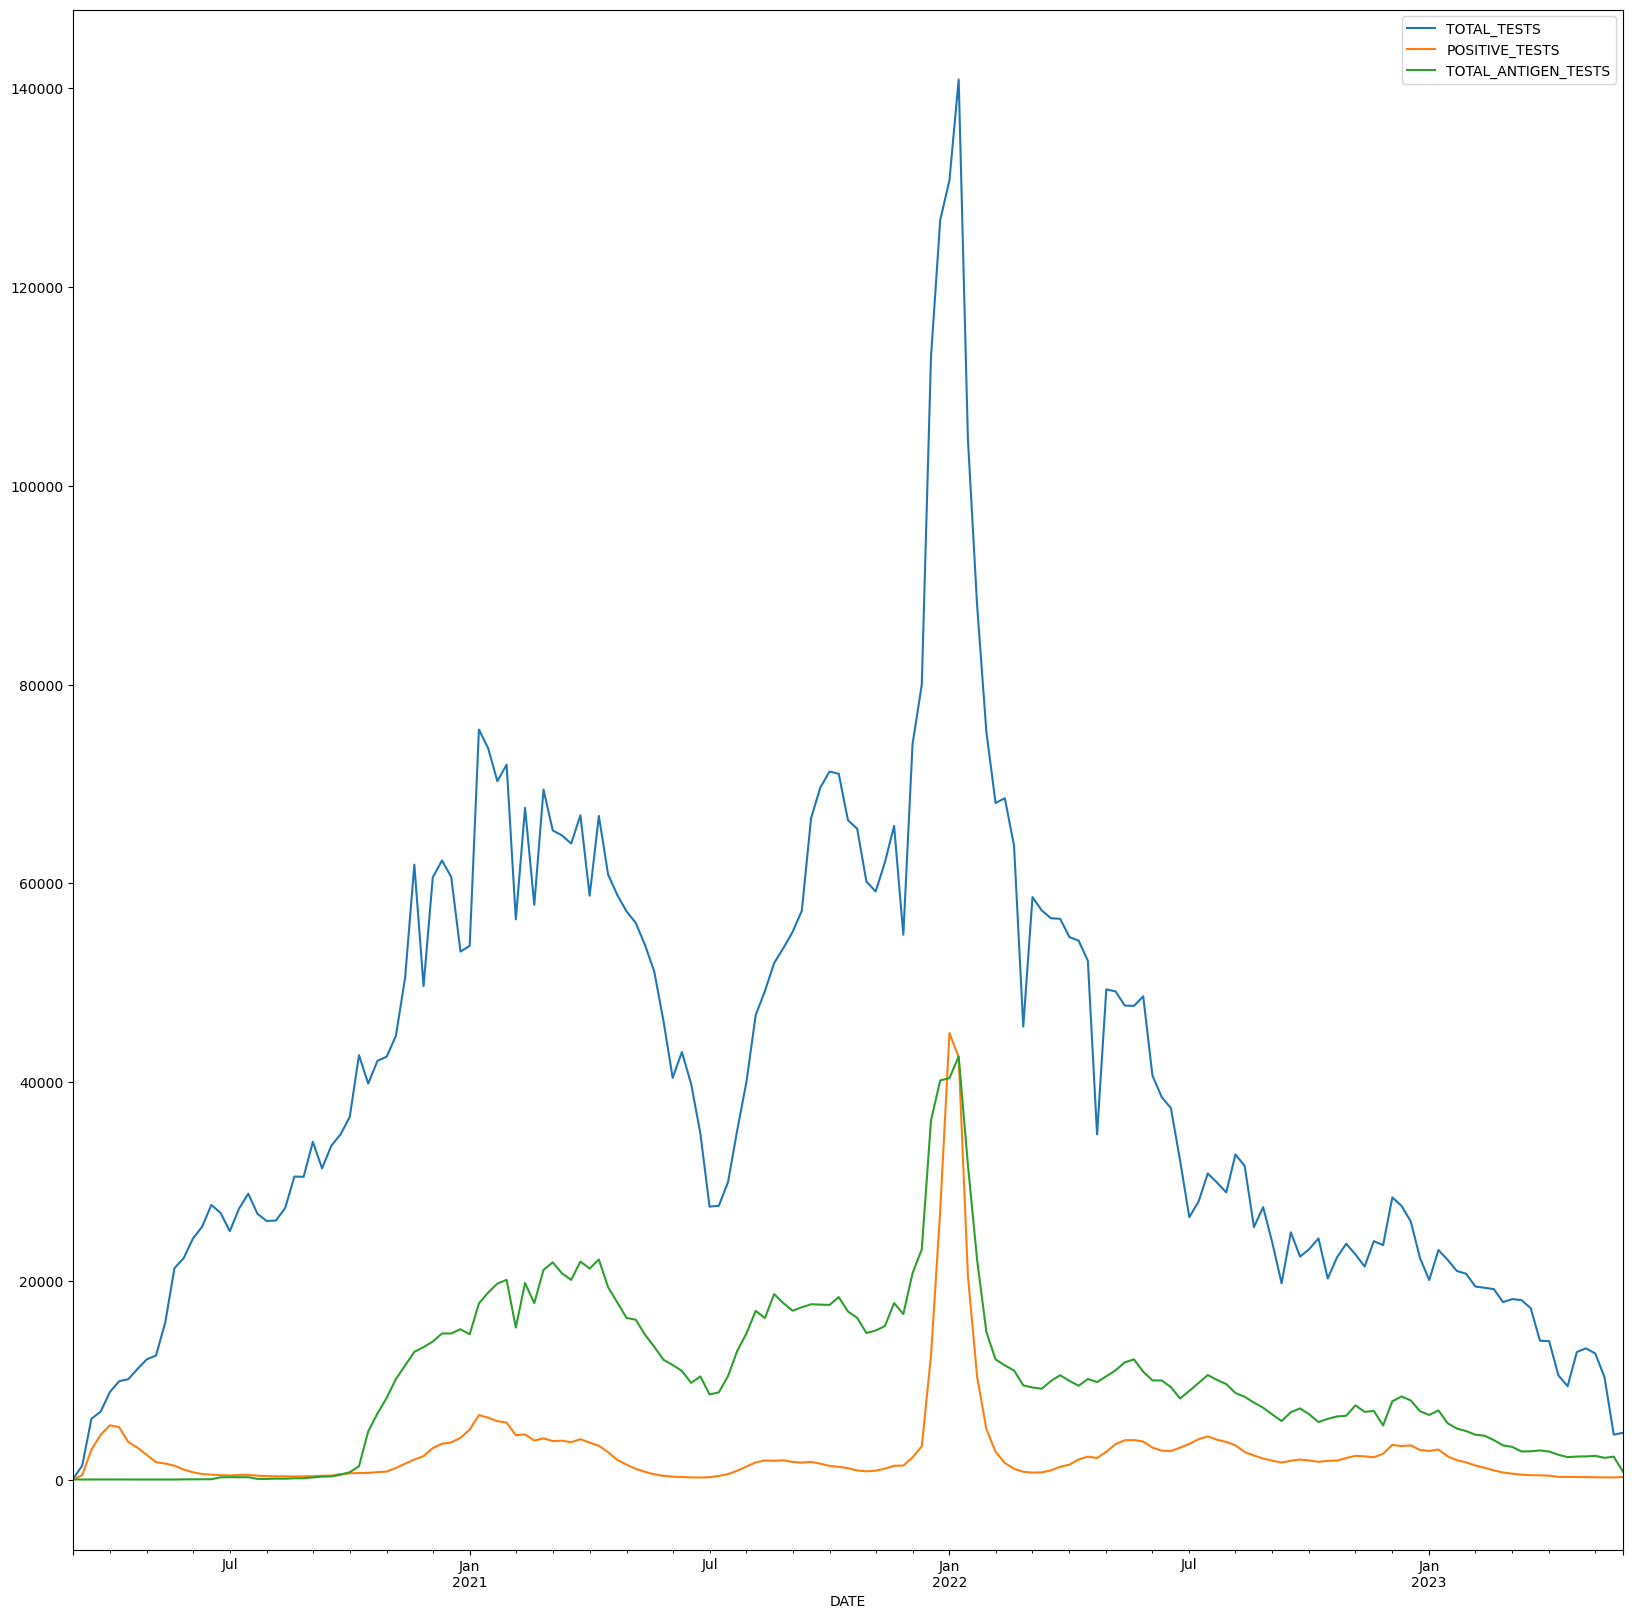

In [36]:
df_test.resample('W')[['TOTAL_TESTS', 'POSITIVE_TESTS', 'TOTAL_ANTIGEN_TESTS']].mean().plot(kind='line', figsize=(20,20))

**Analysis**: Based on the graph above, we could see that the number of tests was low in the beginning due to the preparation phase of government and other private institutions. The antigen test was on zero since it's still developing. In Jan 2022, the number of `POSITIVE_TEST` was not as many as the `TOTAL_TESTS`, showing that the government and other institutions had better cope with the situation. 

## 4# Analyzing Various Group Impacted

In [37]:
df_covid_bygroup

,group,subgroup,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Age group,0-4,20249.26,23995.17,779.62,NaN,106049.0,19618.0,125667.0,4083.0,NaN
1,Age group,5-12,26333.45,31727.01,259.65,NaN,196858.0,40320.0,237178.0,1941.0,NaN
2,Age group,13-17,28532.12,35035.83,413.77,NaN,123500.0,28151.0,151651.0,1791.0,NaN
3,Age group,0-17,NaN,NaN,NaN,3.11,NaN,NaN,NaN,NaN,53.0
4,Age group,18-24,37524.19,46234.35,898.86,10.93,264422.0,61378.0,325800.0,6334.0,77.0
5,Age group,25-34,38010.47,46326.38,1142.68,28.17,563961.0,123383.0,687344.0,16954.0,418.0
6,Age group,35-44,38750.35,46485.20,1587.29,90.33,440555.0,87938.0,528493.0,18046.0,1027.0
7,Age group,45-54,36321.93,43384.56,2249.42,254.55,373421.0,72610.0,446031.0,23126.0,2617.0
8,Age group,55-64,34135.03,40704.78,3729.50,644.19,340984.0,65627.0,406611.0,37255.0,6435.0
9,Age group,65-74,29639.19,35101.25,5817.79,1444.36,213045.0,39261.0,252306.0,41818.0,10382.0


Before jumping in to analyze the data, let's drop unnecessary rows and fill the empty data.

In [38]:
df_covid_bygroup = df_covid_bygroup.drop(3)

In [39]:
df_covid_bygroup = df_covid_bygroup.fillna(0)

In [40]:
df_covid_bygroup.head()

,group,subgroup,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Age group,0-4,20249.26,23995.17,779.62,0.00,106049.0,19618.0,125667.0,4083.0,0.0
1,Age group,5-12,26333.45,31727.01,259.65,0.00,196858.0,40320.0,237178.0,1941.0,0.0
2,Age group,13-17,28532.12,35035.83,413.77,0.00,123500.0,28151.0,151651.0,1791.0,0.0
4,Age group,18-24,37524.19,46234.35,898.86,10.93,264422.0,61378.0,325800.0,6334.0,77.0
5,Age group,25-34,38010.47,46326.38,1142.68,28.17,563961.0,123383.0,687344.0,16954.0,418.0


This dataset provides many different groups based on age, sex, borough, race, and poverty level. Let's divide the data into groups to analyze it better.

In [41]:
df_age = df_covid_bygroup[df_covid_bygroup['group'] == 'Age group'].set_index('subgroup').drop(columns=['group'])
df_sex = df_covid_bygroup[df_covid_bygroup['group'] == 'Sex'].set_index('subgroup').drop(columns=['group'])
df_borough = df_covid_bygroup[df_covid_bygroup['group'] == 'Borough'].set_index('subgroup').drop(columns=['group'])
df_race = df_covid_bygroup[df_covid_bygroup['group'] == 'Race'].set_index('subgroup').drop(columns=['group'])
df_poverty = df_covid_bygroup[df_covid_bygroup['group'] == 'Poverty'].set_index('subgroup').drop(columns=['group'])

### Which Age was impacted the most by Covid-19?

<Axes: xlabel='subgroup'>

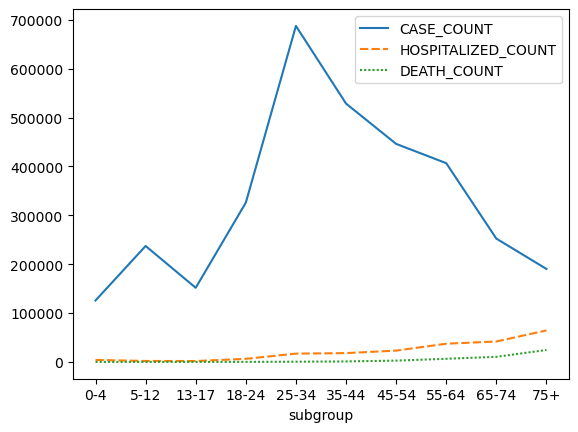

In [42]:
sns.lineplot(df_age[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

The `CASE_COUNT` was far significant compared to other subgroup. To understand this better, let's normalize the data using min-max scalling method.

In [43]:
df_age_mm = (df_age - df_age.min()) / (df_age.max() - df_age.min())

<Axes: xlabel='subgroup'>

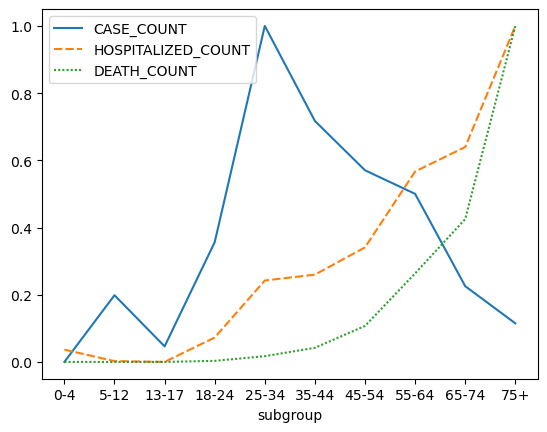

In [44]:
sns.lineplot(df_age_mm[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

Now, we can understand the data better. Although the line shapes were not changed, the scale showed the condition better. 

**Analysis**: We can see that the cases were highly impacted individuals in the most productive age, between 25-34. Older than that age, the number of cases significantly dropped until the last group -- people older than 75 years old. But we could see that the number of hospitalized and deaths kept rising from the youngest age to the oldest one. We could conclude that even though people impacted by COVID-19 at 75+ years old were not as many as 25-34, the impact was devastating and most likely led to death.

### Which Sex was impacted the most by Covid-19?

In [45]:
df_sex

,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
subgroup,,,,,,,,,
Female,35015.04,42223.64,2454.74,459.32,1526088.0,314178.0,1840266.0,106987.0,20019.0
Male,31490.87,37628.05,2733.86,638.87,1252845.0,244164.0,1497009.0,108765.0,25417.0


In [46]:
df_sex.reset_index()

,subgroup,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Female,35015.04,42223.64,2454.74,459.32,1526088.0,314178.0,1840266.0,106987.0,20019.0
1,Male,31490.87,37628.05,2733.86,638.87,1252845.0,244164.0,1497009.0,108765.0,25417.0


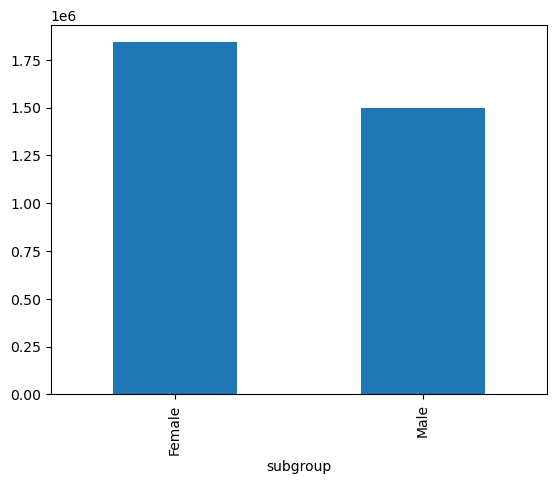

In [47]:
ax = df_sex['CASE_COUNT'].plot(kind='bar')

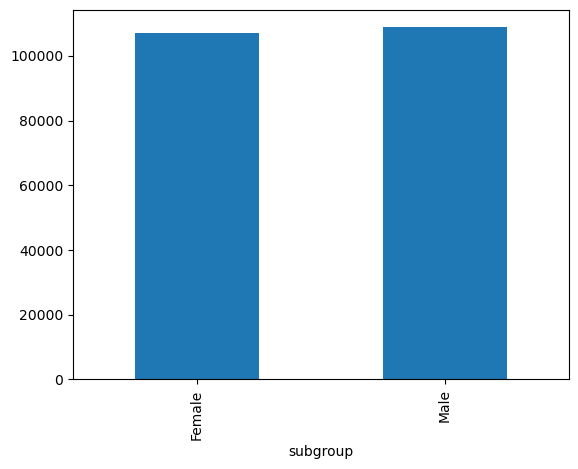

In [48]:
ax = df_sex['HOSPITALIZED_COUNT'].plot(kind='bar')

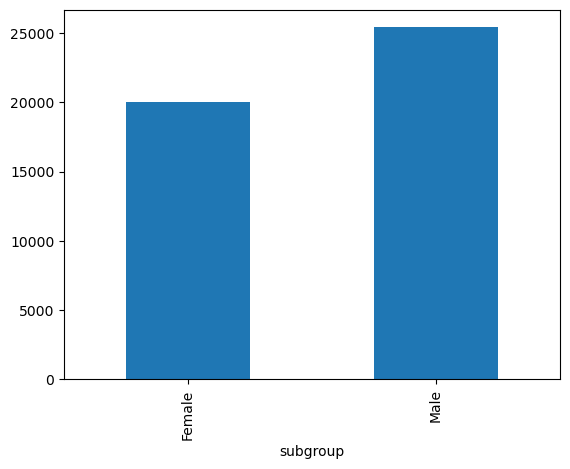

In [49]:
ax = df_sex['DEATH_COUNT'].plot(kind='bar')

**Analysis**: Based on several graphs above, we could see that the number of females who were being infected was higher than the number of males. Even though the number of hospitalized was approximately the same, the number of deaths in Males was higher than in females. 

### Which Borough was impacted the most by Covid-19?

In [50]:
df_borough.head()

,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
subgroup,,,,,,,,,
Bronx,32452.95,40317.60,3236.55,604.57,460250.0,111537.0,571787.0,45901.0,8574.0
Brooklyn,32819.60,38786.55,2537.21,559.12,840150.0,152748.0,992898.0,64950.0,14313.0
Manhattan,31436.61,37914.02,2017.49,382.64,512010.0,105498.0,617508.0,32859.0,6232.0
Queens,34532.39,41520.45,2623.06,601.19,778311.0,157501.0,935812.0,59120.0,13550.0
StatenIsland,41038.51,49210.01,2716.41,581.13,195402.0,38908.0,234310.0,12934.0,2767.0


<Axes: xlabel='subgroup'>

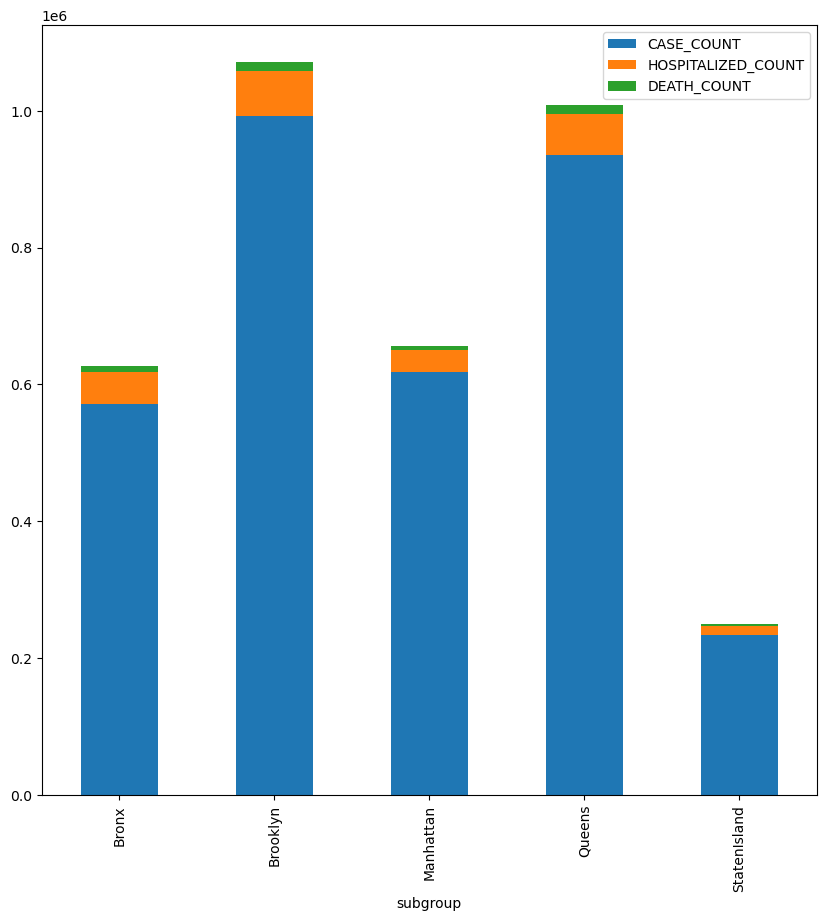

In [51]:
df_borough[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']].plot(kind='bar', stacked=True, figsize=(10,10))

**Analysis** : Based on the graph above, we can see that COVID-19 hit Brooklyn and Queens the most.  It's probably because Queens and Brooklyn were the most crowded living areas among other boroughs.

### Which Race was impacted the most by Covid-19?`

<Axes: ylabel='subgroup'>

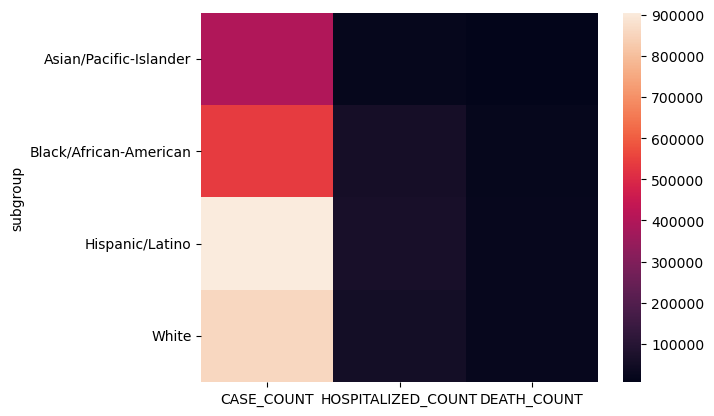

In [52]:
sns.heatmap(df_race[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

As it is hard to compare since the `CASE_COUNT` was far significant compared to other data, we have to normalize the data. Let's use min-max normalization.

In [53]:
df_race_mm = (df_race - df_race.min()) / (df_race.max() - df_race.min())

<Axes: ylabel='subgroup'>

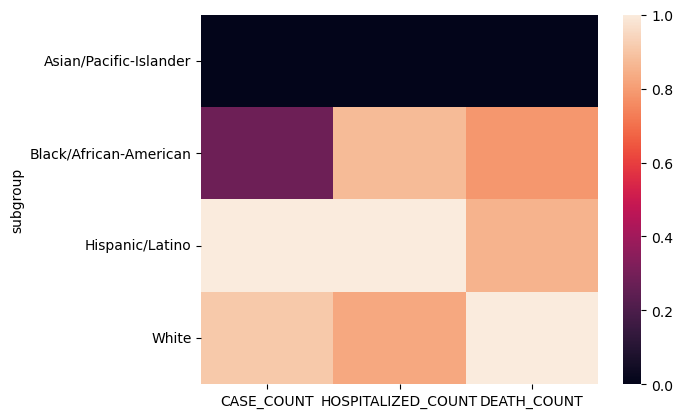

In [54]:
sns.heatmap(df_race_mm[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

Based on the graph above, it's still hard to see the impact on `Asian/Pacific-Islander` subgroup. Let's change the methodology to Z-score normalization.

In [55]:
df_race_z = (df_race - df_race.mean()) / df_race.std()

<Axes: ylabel='subgroup'>

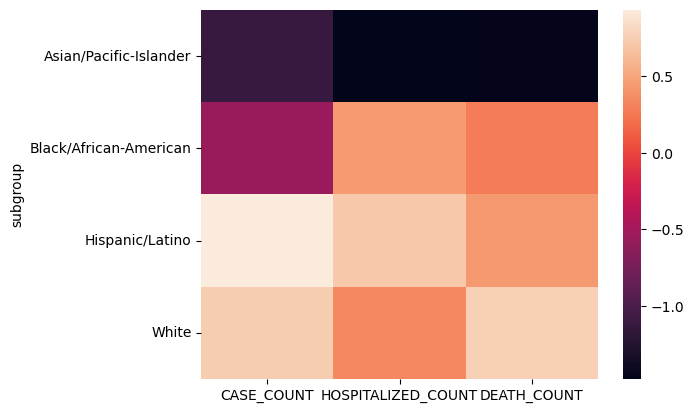

In [56]:
sns.heatmap(df_race_z[['CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

**Analysis**: Based on the graph, we could see the number of Hispanics/Latinos cases led to the highest number of hospitalized as well. The White subgroup had the highest number of deaths. While for the Asian/Pacific-Islander subgroup, the number of cases, hospitalized, and deaths was still the lowest among other subgroups.</br>

Let's do further analysis based on the rate.

<Axes: ylabel='subgroup'>

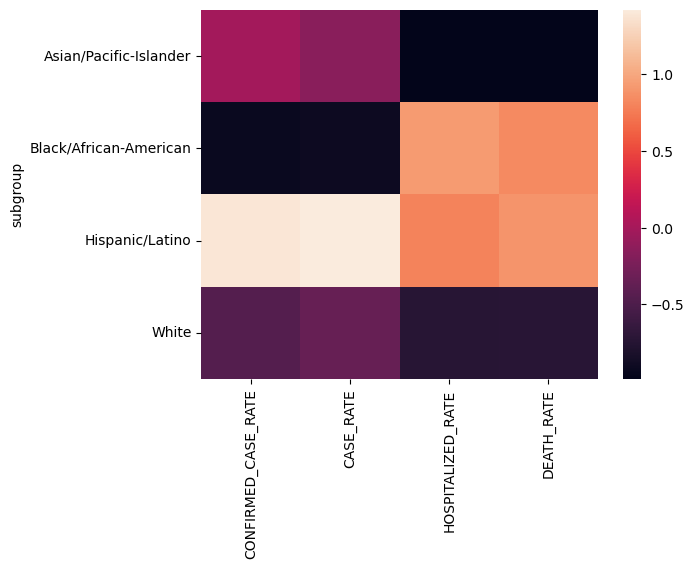

In [57]:
sns.heatmap(df_race_z[['CONFIRMED_CASE_RATE', 'CASE_RATE', 'HOSPITALIZED_RATE', 'DEATH_RATE']])

**Analysis** : Based on the graph above, there were several differences compared to the previous heatmap. 

Although the number of deaths for the White group was the highest in the previous graph, if we look up the ratio, the number of deaths rate was actually relatively low.

The number of Black/African Americans actually had the lowest case ratio compared to Asian/Pacific Islanders in the previous data.

Regardless of what data we saw, the cases were the highest either based on count or rate for Hispanics/Latinos.

### Which Poverty Level was impacted the most by Covid-19?`

In [58]:
df_poverty.head()

,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
subgroup,,,,,,,,,
Low poverty,31489.30,38449.39,1518.54,320.42,508474.0,113012.0,621486.0,31028.0,7094.0
Medium poverty,31902.68,38784.59,2124.27,453.99,1127766.0,241646.0,1369412.0,85405.0,19128.0
High poverty,32414.24,38163.43,2565.77,531.39,669907.0,118753.0,788660.0,55944.0,11785.0
Very high poverty,31869.47,38413.15,3252.15,606.11,366282.0,75651.0,441933.0,36234.0,6477.0


<Axes: xlabel='subgroup'>

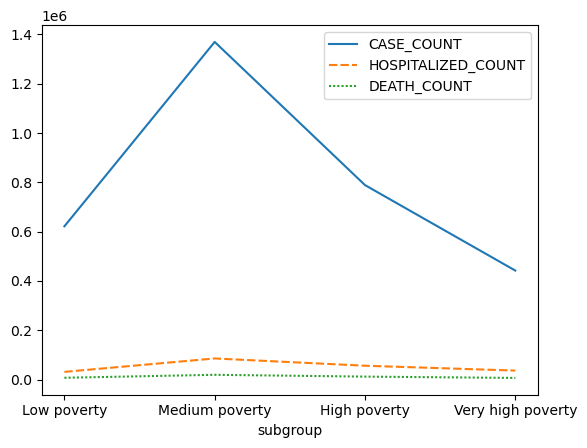

In [59]:
sns.lineplot(df_poverty[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

It's hard to compare the data as the `CASE_COUNT` was far more significant among other aspects. Let's do the normalization process for this graph.

In [60]:
df_poverty_mm = (df_poverty - df_poverty.min()) / (df_poverty.max() - df_poverty.min())

<Axes: xlabel='subgroup'>

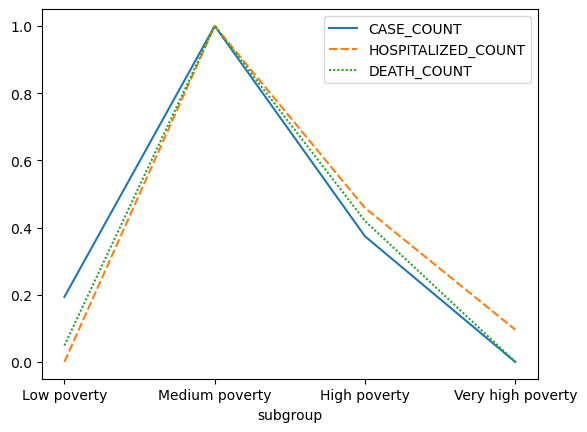

In [61]:
sns.lineplot(df_poverty_mm[['CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT']])

**Analysis**: Based on the graph above, we could see that the most impacted individuals were in the middle-income group, having the most case count, hospitalized count, and death count.

Both low and high poverty levels had approximately the same numbers in the three aspects.